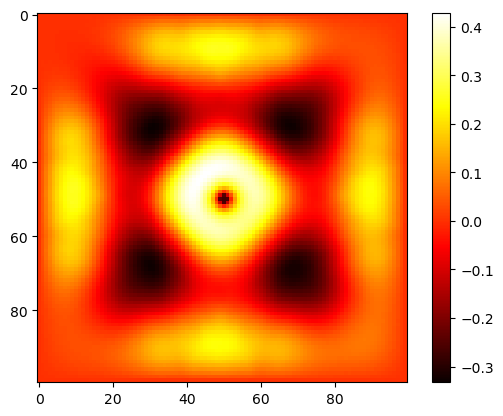

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 5000  # Speed of sound in air in m/s
dx = 0.1  # Spatial resolution in meters
dt = dx / c / 2  # Time step (CFL condition)

# Domain
size = 100  # Size of the 2D grid
time_steps = 1000  # Number of time steps to simulate

# Initialize pressure and pressure derivatives
p = np.zeros((size, size))
p_prev = np.zeros((size, size))
p_next = np.zeros((size, size))

# Initial conditions: place a source
frequency = 100  # Frequency of the source in Hz
damper = 0.1  # Damping factor

frames = []

# Simulation loop
for t in range(time_steps):
    p[size//2, size//2] = np.sin(2 * np.pi * frequency * t * dt)
    for i in range(1, size-1):
        for j in range(1, size-1):
            p_next[i, j] = (c**2 * dt**2 / dx**2) * (p[i+1, j] + p[i-1, j] + p[i, j+1] + p[i, j-1] - 4*p[i, j]) + 2*p[i, j] - p_prev[i, j]

    # Reflective boundary conditions
    p_next[0, :] = p_next[1, :] * damper
    p_next[-1, :] = p_next[-2, :] * damper
    p_next[:, 0] = p_next[:, 1] * damper
    p_next[:, -1] = p_next[:, -2] * damper

    # Update pressures for next time step
    p_prev, p, p_next = p, p_next, p_prev

    # Save the frame
    frames.append(p.copy())

# Plot the final state of the wave
plt.imshow(p, cmap='hot')
plt.colorbar()
plt.show()


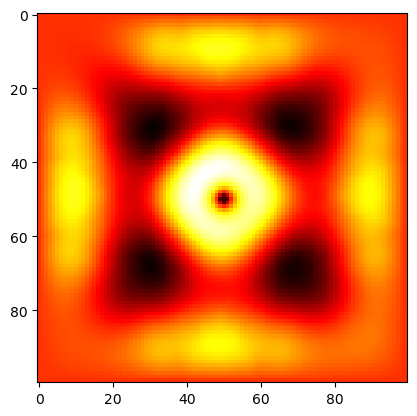

In [3]:
# Save all the frames as an mp4
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for frame in frames:
    im = plt.imshow(frame, animated=True, cmap='hot')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
ani.save('wave_equation.mp4')